# NLP and Supervised Learning - Flight Tweets Sentiment Classification

## Classification of Text Data

# The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

This data originally came from Crowdflower's Data for Everyone library.

As the original source says,

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Goal: Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. In the future we could use such an algorithm to automatically read and flag tweets for an airline for a customer service agent to reach out to contact.

### Business Usecase: 
+ As these data are already labled like which words are negative, positive and netural. So we can utiized those information to create classification model that takes in raw text data and report back the tweet sentiment.
+ In this way, in the future when the model detect negative tweets, we can alert customer service and CS can reach out to the customer. There is no need for human staff to go through all the tweets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

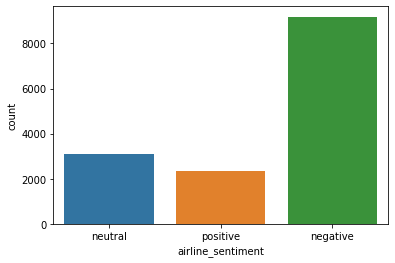

In [9]:
sns.countplot(data=df, x='airline_sentiment');

For our problem, we want to catch `negative` so that it can be handled properly. So if model confuse between `neutral` and `postive`, it doesn't really matter. 

And the problem is more like binary classification rather than multi-classification.

But in real world use case can be different and customer service may reach out to positive customers too. It is all based on requirements.

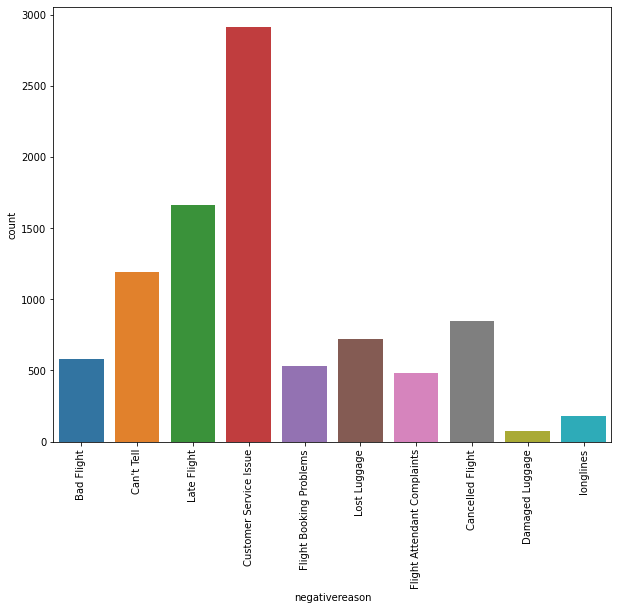

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='negativereason');
plt.xticks(rotation=90);

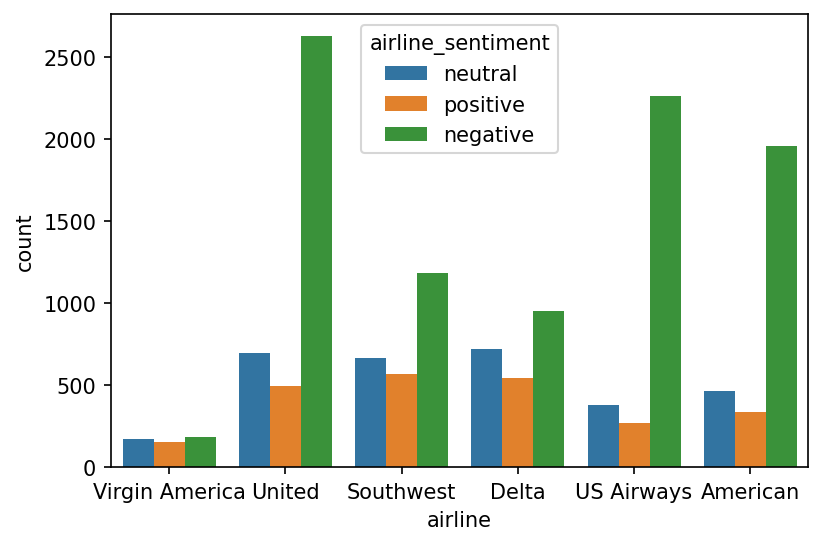

In [18]:
plt.figure(dpi=150)
sns.countplot(data=df, x='airline', hue='airline_sentiment');

-------

# Features and Label

For this, we want to get the raw data text for the analysis.

In [19]:
data = df[['airline_sentiment','text']]

In [20]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [21]:
X = data['text']
y = data['airline_sentiment']

-----

# Train test split

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

-----

# Vectorization

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [31]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [32]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

**DO NOT USE .todense() for such a large sparse matrix!!!**

------

# Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC 

## Naive Bayes

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
nb = MultinomialNB()

In [35]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_model = LogisticRegression(max_iter=1000)

In [41]:
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## SVM

In [44]:
from sklearn.svm import SVC, LinearSVC

In [52]:
rbf_svc = SVC()
rbf_svc.fit(X_train_tfidf, y_train)

SVC()

In [53]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

-------

# Performance Evaluation

In [57]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [64]:
# custom function
def report(model):
    pred = model.predict(X_test_tfidf)
    print(classification_report(y_test, pred))
    plot_confusion_matrix(model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



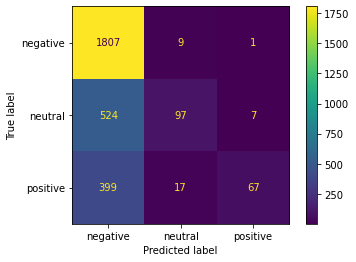

In [65]:
report(nb)

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



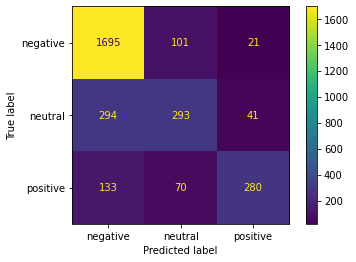

In [66]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1817
     neutral       0.67      0.41      0.51       628
    positive       0.81      0.56      0.66       483

    accuracy                           0.77      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.76      0.77      0.75      2928



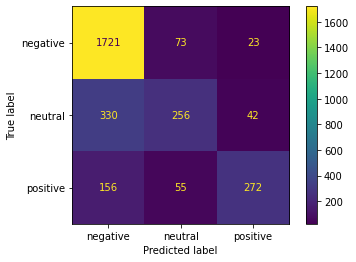

In [68]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



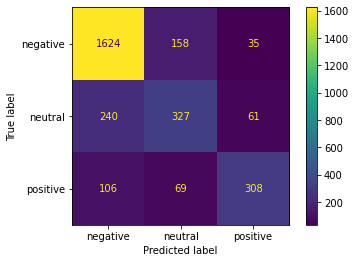

In [69]:
report(linear_svc)

---------

# Finalizing a PipeLine for Deployment on  New Tweets

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly.

In [70]:
from sklearn.pipeline import Pipeline

In [71]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('scv', LinearSVC()),
])

In [72]:
# fit on entire data
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('scv', LinearSVC())])

In [77]:
new_tweet = ['I did enjoy the flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [80]:
new_tweet = ['I did take from NY to LA']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [82]:
new_tweet = ['it just ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)

In [83]:
new_tweet = ['so so flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)